In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, kruskal

In [78]:
try:
    data = pd.read_csv('dortmund_data.csv', encoding='utf-8')
except UnicodeDecodeError:
    try:
        data = pd.read_csv('dortmund_data.csv', encoding='latin-1')
    except UnicodeDecodeError:
        data = pd.read_csv('dortmund_data.csv', encoding='iso-8859-1')

In [79]:
data.head(5)

,all_riders,rider_class,stage,points,stage_class
0,Tadej Poga?ar,All Rounder,X1,15,flat
1,Tadej Poga?ar,All Rounder,X2,219,hills
2,Tadej Poga?ar,All Rounder,X3,34,flat
3,Tadej Poga?ar,All Rounder,X4,264,hills
4,Tadej Poga?ar,All Rounder,X6,114,hills


In [80]:
# --- Basic Data Overview ---
print("=== DATA INFO ===")
print(data.info(), "\n")

=== DATA INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3496 entries, 0 to 3495
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   all_riders   3496 non-null   object
 1   rider_class  3496 non-null   object
 2   stage        3496 non-null   object
 3   points       3496 non-null   int64 
 4   stage_class  3496 non-null   object
dtypes: int64(1), object(4)
memory usage: 136.7+ KB
None 



In [81]:
print("=== FIRST 5 ROWS ===")
print(data.head(), "\n")

=== FIRST 5 ROWS ===
      all_riders  rider_class stage  points stage_class
0  Tadej Poga?ar  All Rounder    X1      15        flat
1  Tadej Poga?ar  All Rounder    X2     219       hills
2  Tadej Poga?ar  All Rounder    X3      34        flat
3  Tadej Poga?ar  All Rounder    X4     264       hills
4  Tadej Poga?ar  All Rounder    X6     114       hills 



In [82]:
# --- Descriptive Statistics for 'points' ---
print("=== DESCRIPTIVE STATISTICS FOR POINTS ===")
print(data['points'].describe(), "\n")

=== DESCRIPTIVE STATISTICS FOR POINTS ===
count    3496.000000
mean       12.385297
std        36.285334
min         0.000000
25%         0.000000
50%         0.000000
75%         8.000000
max       304.000000
Name: points, dtype: float64 



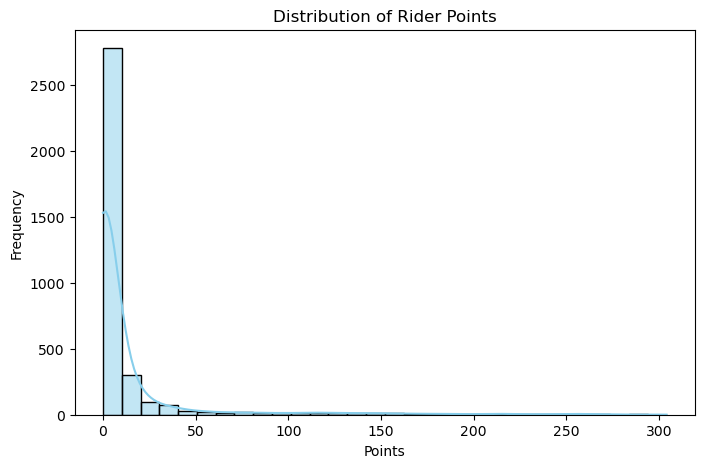

In [83]:
# --- Check Normality (Histogram) ---
plt.figure(figsize=(8,5))
sns.histplot(data['points'], kde=True, bins=30, color='skyblue')
plt.title("Distribution of Rider Points")
plt.xlabel("Points")
plt.ylabel("Frequency")
plt.show()

In [84]:
mean_points = data.groupby(['rider_class', 'stage_class'])['points'].mean().unstack()
print("=== MEAN POINTS BY RIDER CLASS AND STAGE CLASS ===")
print(mean_points, "\n")

=== MEAN POINTS BY RIDER CLASS AND STAGE CLASS ===
stage_class       flat      hills      mount
rider_class                                 
All Rounder  15.441176  35.786765  67.423529
Climber       5.094203  21.668478  35.860870
Sprinter     38.977011   5.202586   2.041379
Unclassed     5.740580   9.096739   2.951304 



In [85]:
data['stage_class'].unique()
data['stage_class'].value_counts()


stage_class
hills    1472
flat     1104
mount     920
Name: count, dtype: int64

In [86]:
data['rider_class'].unique()
data['rider_class'].value_counts()

rider_class
Unclassed      2185
Sprinter        551
Climber         437
All Rounder     323
Name: count, dtype: int64

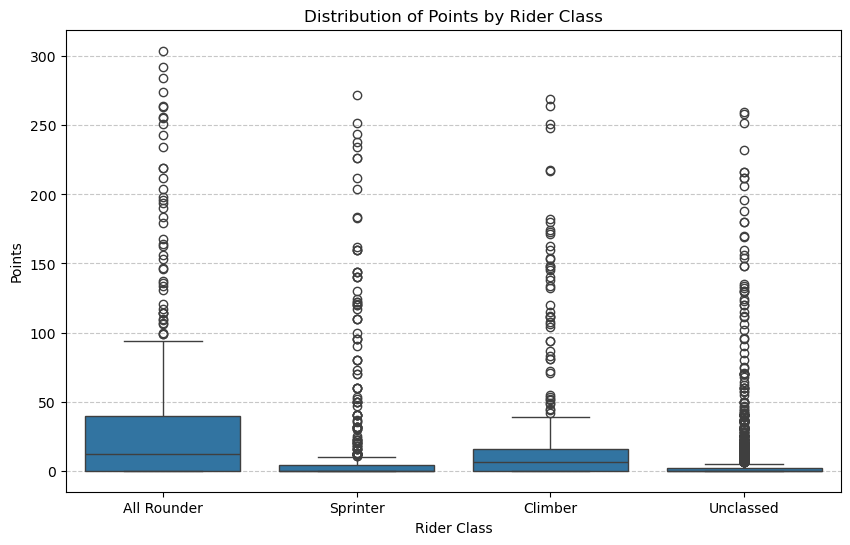

In [96]:
# --- Boxplot: Distribution of Points by Rider Class ---
plt.figure(figsize=(10,6))
sns.boxplot(x='rider_class', y='points', data=data)
plt.title('Distribution of Points by Rider Class')
plt.xlabel('Rider Class')
plt.ylabel('Points')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<Axes: xlabel='rider_class', ylabel='points'>

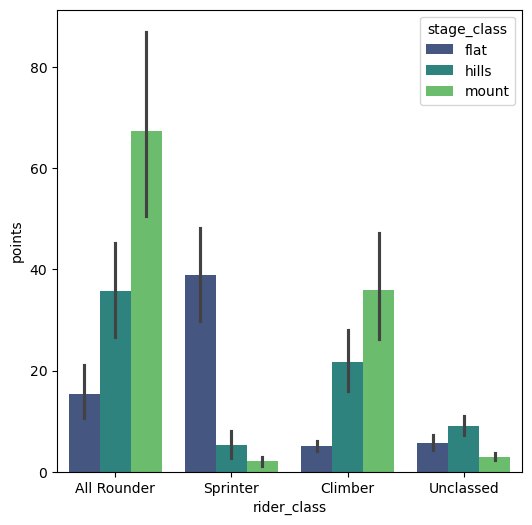

In [97]:
plt.figure(figsize=(6,6))
sns.barplot(x='rider_class',y='points',data=data,hue='stage_class', palette='viridis')

<Axes: xlabel='stage_class', ylabel='points'>

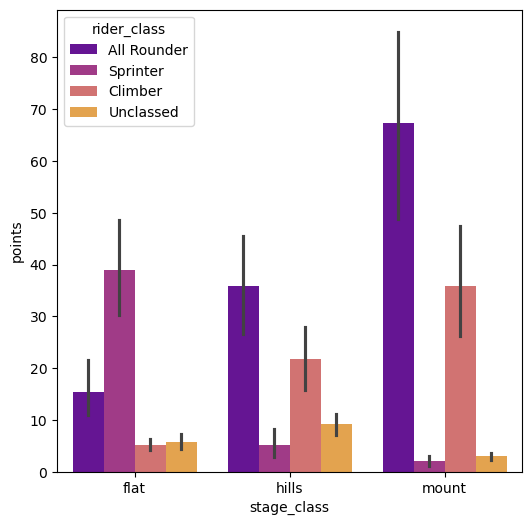

In [98]:
plt.figure(figsize=(6,6))
sns.barplot(x='stage_class',y='points',data=data,hue='rider_class', palette='plasma')

<Figure size 1000x600 with 0 Axes>

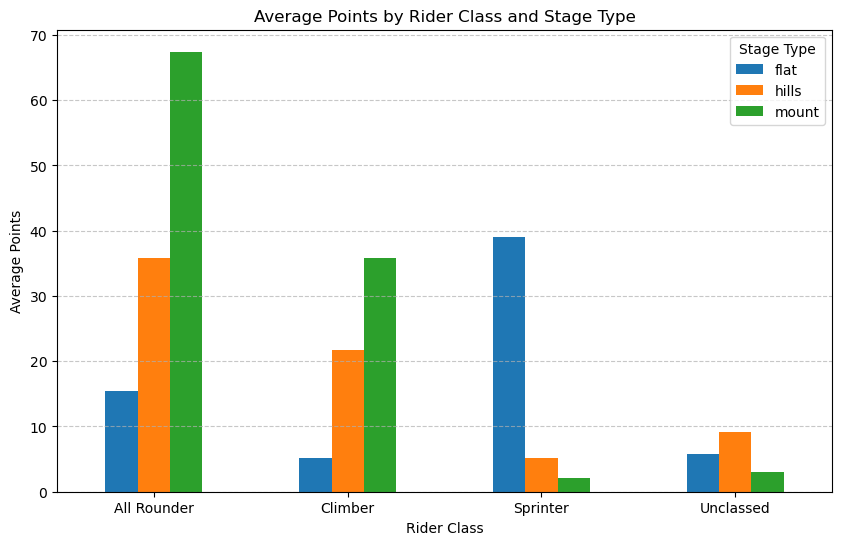

In [99]:
# --- Grouped Bar Chart: Average Points by Rider and Stage Type ---
plt.figure(figsize=(10,6))
mean_points.plot(kind='bar', figsize=(10,6))
plt.title('Average Points by Rider Class and Stage Type')
plt.ylabel('Average Points')
plt.xlabel('Rider Class')
plt.xticks(rotation=0)
plt.legend(title='Stage Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

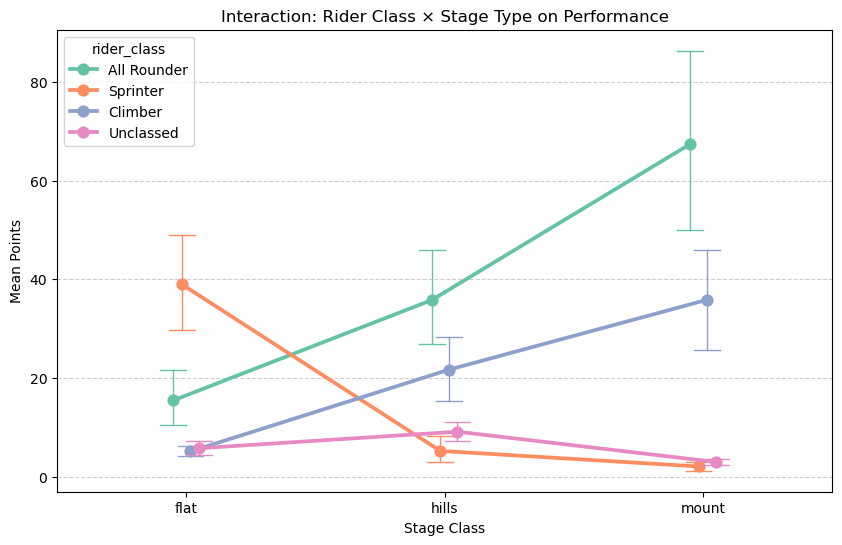

In [100]:
# --- Interaction Plot ---
plt.figure(figsize=(10,6))
sns.pointplot(data=data, x='stage_class', y='points', hue='rider_class',
              dodge=True, markers='o', capsize=.1, err_kws={'linewidth': 1}, palette='Set2')
plt.title('Interaction: Rider Class × Stage Type on Performance')
plt.ylabel('Mean Points')
plt.xlabel('Stage Class')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [101]:
# --- One-way ANOVA: Effect of Rider Class on Points ---
anova_groups = [group["points"].values for name, group in data.groupby("rider_class")]
f_stat, p_val = f_oneway(*anova_groups)
print("=== ONE-WAY ANOVA: Rider Class Effect ===")
print(f"F-statistic: {f_stat:.3f}")
print(f"P-value: {p_val:.6f}")
if p_val < 0.05:
    print("➡️ Significant difference exists between rider classes.\n")
else:
    print("➡️ No significant difference between rider classes.\n")

=== ONE-WAY ANOVA: Rider Class Effect ===
F-statistic: 85.505
P-value: 0.000000
➡️ Significant difference exists between rider classes.



In [102]:
# --- Kruskal–Wallis (Non-parametric alternative) ---
h_stat, p_kruskal = kruskal(*anova_groups)
print("=== KRUSKAL–WALLIS TEST (Non-parametric) ===")
print(f"H-statistic: {h_stat:.3f}")
print(f"P-value: {p_kruskal:.6f}")
if p_kruskal < 0.05:
    print("➡️ Rider class differences are statistically significant (non-parametric test).\n")
else:
    print("➡️ No significant difference (non-parametric test).\n")

=== KRUSKAL–WALLIS TEST (Non-parametric) ===
H-statistic: 330.201
P-value: 0.000000
➡️ Rider class differences are statistically significant (non-parametric test).



In [103]:
# --- Summary Interpretation ---
print("=== INTERPRETATION ===")
print("1️⃣ The interaction plot visually shows how stage type impacts each rider class differently.")
print("2️⃣ The one-way ANOVA tests if average points differ by rider class")
print("3️⃣ If p < 0.05 → differences are statistically significant.")

=== INTERPRETATION ===
1️⃣ The interaction plot visually shows how stage type impacts each rider class differently.
2️⃣ The one-way ANOVA tests if average points differ by rider class
3️⃣ If p < 0.05 → differences are statistically significant.
